# ohlcv

In [1]:
import vectorbt as vbt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from numba import njit

In [3]:
print(vbt.settings.ohlcv['column_names'])

Config({
    "open": "Open",
    "high": "High",
    "low": "Low",
    "close": "Close",
    "volume": "Volume"
})


In [4]:
try:
    pd.DataFrame([1, 2, 3]).vbt.ohlcv.plot()
except Exception as e:
    print(e) # couldn't find default column names

Can only use .str accessor with string values!


In [5]:
ohlcv_ts = pd.DataFrame({
    'open': [1, 2, 3], 
    'high': [1, 2, 3], 
    'low': [1, 2, 3], 
    'close': [1, 2, 3], 
    'volume': [1, 2, 3]
})

In [6]:
ohlcv_ts = pd.DataFrame(
    columns=['open', 'high', 'low', 'close', 'volume'],
    index=[datetime(2018, 1, 1) + timedelta(days=i) for i in range(10)]
)
ohlcv_ts['open'] = np.cumsum(np.random.uniform(-0.8, 1, size=(10,)))
ohlcv_ts['close'] = ohlcv_ts['open'] + np.random.uniform(-1, 1, size=(10,))
ohlcv_ts['high'] = ohlcv_ts['open'] + np.random.uniform(0, 1, size=(10,))
ohlcv_ts['low'] = ohlcv_ts['open'] - np.random.uniform(0, 1, size=(10,))
ohlcv_ts['volume'] = np.cumsum(np.random.uniform(-1, 1, size=(10,)))

print(ohlcv_ts)

                open      high       low     close    volume
2018-01-01 -0.114009  0.747324 -0.828237  0.690699 -0.995608
2018-01-02 -0.266609  0.236435 -0.512139 -0.146882 -1.232772
2018-01-03 -0.277170  0.375640 -0.750984 -0.913757 -1.826497
2018-01-04  0.530109  0.858890 -0.280489 -0.173555 -0.900674
2018-01-05  0.623495  0.660540  0.358187  0.706157 -1.837398
2018-01-06  0.979731  1.788686  0.879741  1.569944 -1.276219
2018-01-07  0.852161  0.857446  0.789570  0.990742 -0.666360
2018-01-08  1.065646  2.049068  0.348863  0.134268 -0.741993
2018-01-09  1.762578  1.856102  1.339465  2.718644 -1.690894
2018-01-10  2.357730  2.766680  1.537807  1.568137 -1.696937


In [7]:
try:
    ohlcv_ts.vbt.ohlcv.plot()
except Exception as e:
    print(e) # still couldn't find default column names

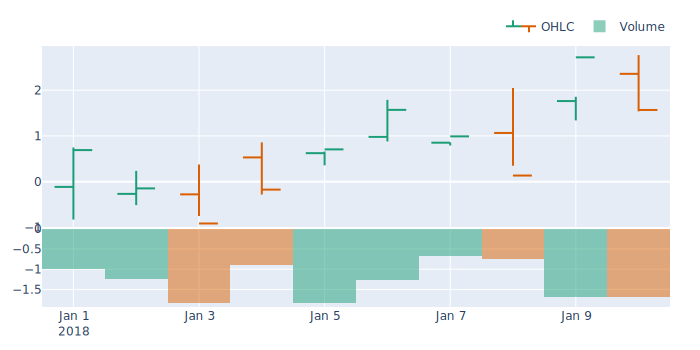

In [8]:
# Specify them manually
ohlcv_ts.vbt.ohlcv(column_names={
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}).plot().show_svg()

In [9]:
# Or by changing the defaults
vbt.settings.ohlcv['column_names'] = {
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}

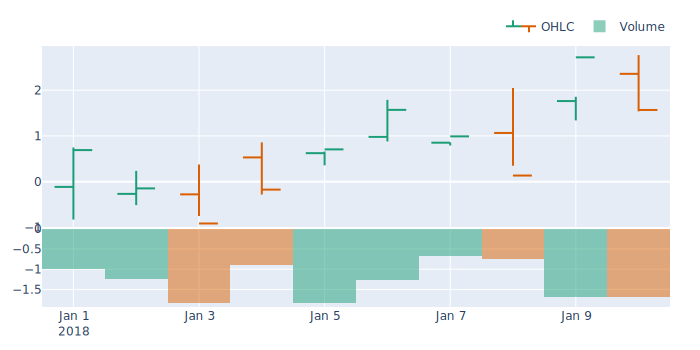

In [10]:
ohlcv_ts.vbt.ohlcv.plot().show_svg()